<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датафрейм содержит NaN значения

In [2]:
import pandas as pd
all_data = pd.read_csv('groceries - groceries.csv')
all_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [17]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)  

Количество уникальных элементов:

In [18]:
len(unique_items)

169

Уникальные элементы:

In [19]:
unique_items

{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [20]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(data, min_support=0.03, use_colnames=True)
result

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(pastry, whole milk)"
59,0.047382,"(root vegetables, other vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(rolls/buns, sausage)"


In [22]:
result["itemsets_len"] = result["itemsets"].apply(lambda x: len(x))

length_itemsets = set(result["itemsets_len"])

for length in length_itemsets:
    length_result = result[(result['itemsets_len'] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result["support"])}, максимальное значение: {max(length_result["support"])}')

При длине 1 минимальное значение: 0.03040162684290798, максимальное значение: 0.25551601423487547
При длине 2 минимальное значение: 0.030096593797661414, максимальное значение: 0.07483477376715811


In [25]:
from mlxtend.frequent_patterns import fpmax

result_fpmax = fpmax(data, min_support=0.03, use_colnames=True)
result_fpmax

,support,itemsets
0,0.030402,(specialty chocolate)
1,0.031012,(onions)
2,0.032944,(hygiene articles)
3,0.033249,(berries)
4,0.033249,(hamburger meat)
5,0.033452,(UHT-milk)
6,0.033859,(sugar)
7,0.037112,(dessert)
8,0.037417,(long life bakery product)
9,0.037824,(salty snack)


In [26]:
result_fpmax["itemsets_len"] = result_fpmax["itemsets"].apply(lambda x: len(x))

length_itemsets_fpmax = set(result["itemsets_len"])

for length in length_itemsets_fpmax:
    length_result_fpmax = result_fpmax[(result_fpmax["itemsets_len"] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result_fpmax["support"])}, максимальное значение: {max(length_result_fpmax["support"])}')

При длине 1 минимальное значение: 0.03040162684290798, максимальное значение: 0.09852567361464158
При длине 2 минимальное значение: 0.030096593797661414, максимальное значение: 0.07483477376715811


Основное отличие между алгоритмами FPGrowth и FPMax заключается в том, что FPGrowth находит все наборы объектов, которые часто встречаются в данных и удовлетворяют заданному уровню поддержки. С другой стороны, алгоритм FPMax находит только максимальные частотные наборы. Максимальный частотный набор - это такой набор объектов, который не может быть расширен путем добавления других объектов и при этом сохраняет заданный уровень поддержки.

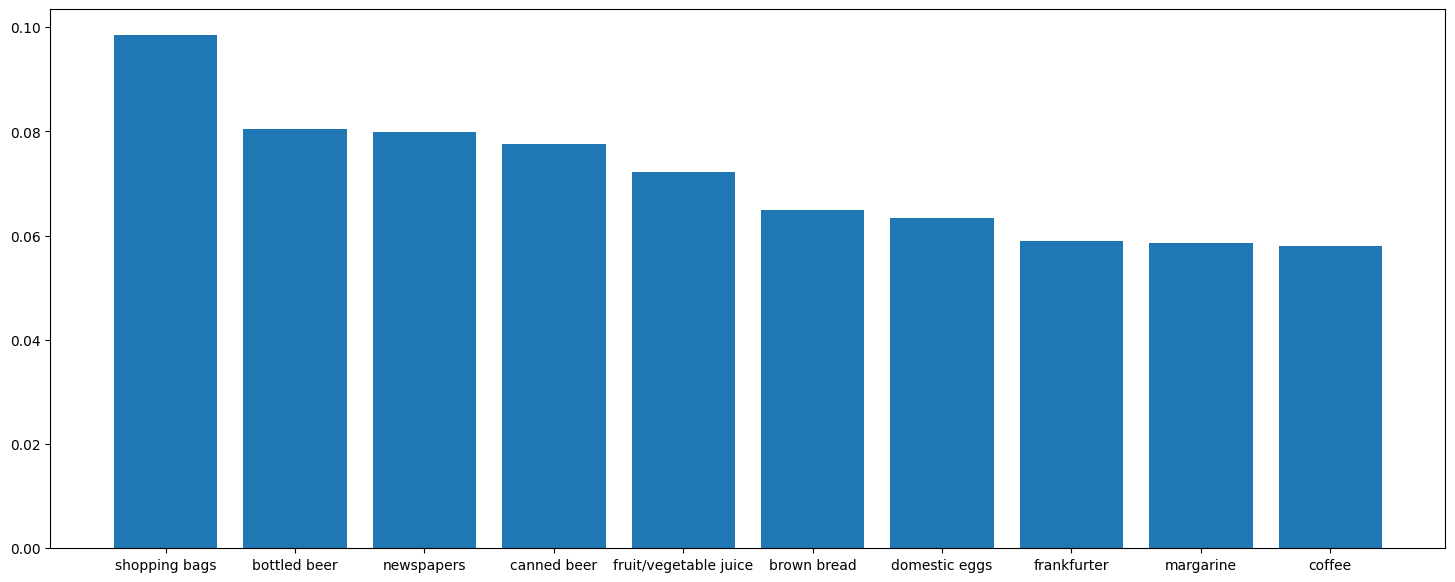

In [27]:
import matplotlib.pyplot as plt

result_fpmax_len1 = fpmax(data, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result_fpmax_len1["itemsets"]:
    items.append(*list(item))

for support in result_fpmax_len1["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(18, 7))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

In [28]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags',
'sausage',
'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer',
'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]

In [29]:
te1 = TransactionEncoder()
te_ary1 = te1.fit(np_data).transform(np_data)
data1 = pd.DataFrame(te_ary1, columns=te1.columns_)

In [30]:
result1 = fpgrowth(data1, min_support=0.03, use_colnames=True)
result1

,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


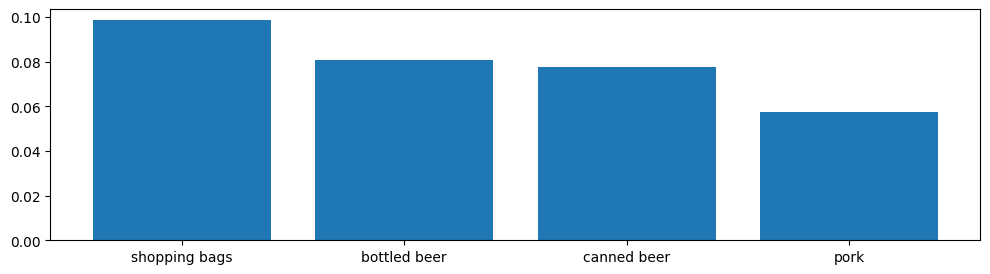

In [31]:
result2 = fpmax(data1, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result2["itemsets"]:
    items.append(*list(item))

for support in result2["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(12, 3))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

Общее количество наборов уменьшилось 

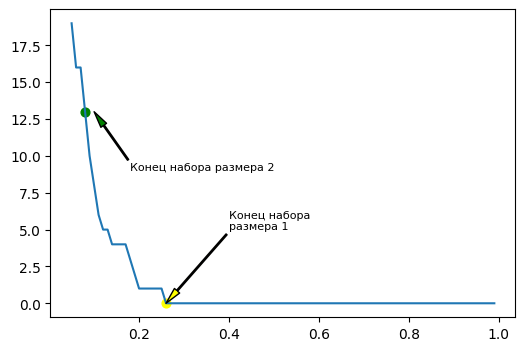

Уровень поддержки при котором перестают генерироваться наборы размера 2: 0.08000000000000000340005801292
Уровень поддержки при котором перестают генерироваться наборы размера 1: 0.2600000000000000071470607208


In [32]:
from decimal import Decimal

import matplotlib.pyplot as plt

start = Decimal(0.05)
support = []
length = []
max_len = []
while start <= 1:
    support.append(start)

    results = fpgrowth(data1, min_support=start, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))

    length.append(len(results))
    if len(results) > 0:
        max_len.append(max(results['length']))

    start += Decimal(0.01)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(support, length)

ax.scatter(support[max_len.index(1)], length[max_len.index(1)], color='green', s=40, marker='o')
ax.annotate('Конец набора размера 2', xy=(support[max_len.index(1)] + Decimal(0.02), length[max_len.index(1)]),
            xytext=(0.18, 9),
            fontsize=8, arrowprops=dict(facecolor='green', width=1, headwidth=5))

ax.scatter(support[len(max_len)], length[len(max_len)], color='yellow', s=40, marker='o')
ax.annotate('Конец набора\nразмера 1', xy=(support[len(max_len)], length[len(max_len)]), xytext=(0.4, 5),
            fontsize=8, arrowprops=dict(facecolor='yellow', width=1, headwidth=5))

plt.show()

print(f'Уровень поддержки при котором перестают генерироваться наборы размера 2: {support[max_len.index(1)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 1: {support[len(max_len)]}')

In [33]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

In [34]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)

In [35]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496


При расчете ассоциативных правил на основе метрики confidence, используются следующие понятия:

1) antecedents (предшествующие условия): это набор элементов, который является условием или предшествует в ассоциативном правиле.
2) consequents (следствия): это набор элементов, который является результатом или следует в ассоциативном правиле.
3) antecedent support (поддержка предшествующих условий): это процент транзакций, в которых содержатся предшествующие элементы.
4) consequent support (поддержка следствий): это процент транзакций, в которых содержатся следствия элементов.
5) support (поддержка): это процент транзакций, в которых содержатся и предшествующие, и следующие элементы.
6) confidence (уверенность): это вероятность того, что следствие элементов будет выполняться при условии, что предшествующие элементы уже выполнены.
7) lift (подъем): это мера того, насколько вероятно, что следствие элементов будет выполняться, при условии, что предшествующие элементы уже выполнены, по сравнению с тем, если они были выбраны независимо друг от друга.
8) leverage (приращение): это мера того, насколько более вероятно, что следствие элементов будет выполняться при условии, что предшествующие элементы уже выполнены, чем если бы они были выбраны случайно, учитывая размер выборки.
9) conviction (убежденность): это мера того, насколько более вероятно, что следствие элементов будет выполняться при условии, что предшествующие элементы уже выполнены, чем если бы они были выбраны случайно, учитывая силу связи между ними.

In [36]:
from statistics import mean, median

import numpy as np

result = fpgrowth(data, min_support=0.04, use_colnames=True)
rules = association_rules(result, min_threshold=0.1, metric='confidence')

print(f'Среднее значение параметра confidence: {mean(rules["confidence"])}')
print(f'Медиана параметра confidence: {median(rules["confidence"])}')
print(f'СКО параметра confidence: {np.std(rules["confidence"])}')
rules

Среднее значение параметра confidence: 0.2829052726691693
Медиана параметра confidence: 0.23824809507666894
СКО параметра confidence: 0.09174103324706069


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
4,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
6,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
7,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
8,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477,0.204103
9,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620,0.201713


In [37]:
rules = association_rules(result, min_threshold=0.01, metric='support')

print(f'Среднее значение параметра support: {mean(rules["support"])}')
print(f'Медиана параметра support: {median(rules["support"])}')
print(f'СКО параметра support: {np.std(rules["support"])}')

rules

Среднее значение параметра support: 0.050240072304129246
Медиана параметра support: 0.047381799694966954
СКО параметра support: 0.010332111871899625


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
4,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
6,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
7,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
8,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477,0.204103
9,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620,0.201713


In [38]:
rules = association_rules(result, min_threshold=0.01, metric='leverage')

print(f'Среднее значение параметра leverage: {mean(rules["leverage"])}')
print(f'Медиана параметра leverage: {median(rules["leverage"])}')
print(f'СКО параметра leverage: {np.std(rules["leverage"])}')

rules

Среднее значение параметра leverage: 0.020838559154364243
Медиана параметра leverage: 0.02071778653838151
СКО параметра leverage: 0.004059627576864452


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
4,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
6,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
7,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
8,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
9,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008


In [39]:
rules = association_rules(result, min_threshold=0.01, metric='conviction')

print(f'Среднее значение параметра conviction: {mean(rules["conviction"])}')
print(f'Медиана параметра conviction: {median(rules["conviction"])}')
print(f'СКО параметра conviction: {np.std(rules["conviction"])}')

rules

Среднее значение параметра conviction: 1.140331125249048
Медиана параметра conviction: 1.1057966943491302
СКО параметра conviction: 0.11799021582624745


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929,0.439613
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
4,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045
6,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
7,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
8,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477,0.204103
9,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620,0.201713


In [40]:
rules = association_rules(result, min_threshold=0.4, metric='confidence')


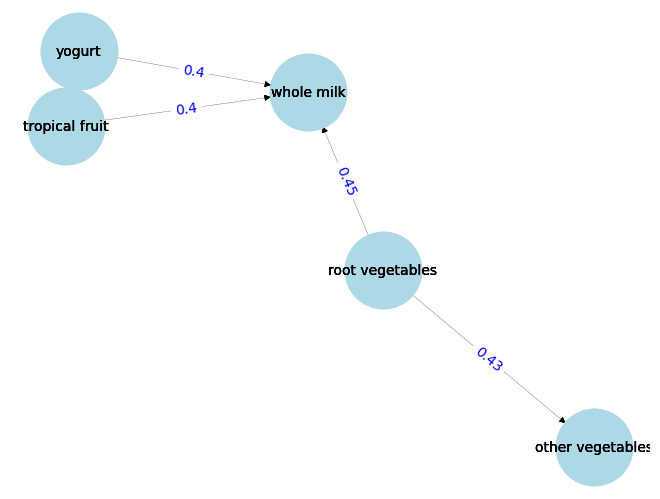

In [49]:
import networkx as nx

antecedents = rules["antecedents"]
consequents = rules["consequents"]
confidence = rules["confidence"]
supports = rules["support"]

edges = []
dict_labels = {}

for i in range(len(antecedents)):
    edges.append([str(list(antecedents[i])[0]), str(list(consequents[i])[0])])
    dict_labels[(str(list(antecedents[i])[0]), str(list(consequents[i])[0]))] = round(confidence[i], 2)

G = nx.DiGraph()
for i in edges:
    G.add_nodes_from(i)
    G.add_edges_from([tuple(i)])

pos = nx.spring_layout(G)
plt.figure()
for i in range(len(dict_labels.items())):
    nx.draw(
        G, pos, edge_color='black', width=round(supports[i], 2), linewidths=1,
        node_size=3000, node_color='lightblue', alpha=0.9, font_size=10,
        labels={node: node for node in G.nodes()})

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=dict_labels,
    font_color='blue'
)

plt.axis('off')
plt.show()

Из графа можно легко определить связи между предшествующими условиями (антецедентами) и результатами (консеквентами), а также уровень поддержки, который характеризует степень поддержки этих связей.